In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import fpfs
import galsim
import numpy as np
from fpfs import pltutil
import lsst.afw.image as afwImg
import astropy.io.fits as pyfits
import matplotlib.pylab as plt
from descwl_shear_sims.sim import make_sim
from descwl_shear_sims.surveys import get_survey, get_wldeblend_rescale_fac
from descwl_shear_sims.galaxies import WLDeblendGalaxyCatalog  # one of the galaxy catalog classes
from descwl_shear_sims.psfs import make_ps_psf,make_fixed_psf  # for making a power spectrum PSF
from descwl_shear_sims.sim import get_se_dim  # convert coadd dims to SE dims

0.3150796795795606
0.3713810487606338
0.5957392307960843
1.1550156050041647
2.680195928559839
---


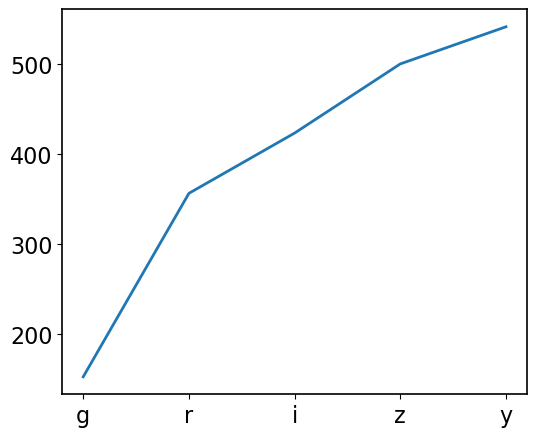

In [4]:
coadd_dim = 7200
buff = 50

galaxy_catalog = WLDeblendGalaxyCatalog(
    rng=rng,
    coadd_dim=coadd_dim,
    buff=buff,
    layout='random_disk',
)

nlist = []
psf = make_fixed_psf(psf_type='moffat')
for bb in ['g', 'r', 'i', 'z', 'y']:
    survey = get_survey(gal_type=galaxy_catalog.gal_type, band=bb)
    scale = get_wldeblend_rescale_fac(survey.descwl_survey)
    print(survey.noise*scale)
    nlist.append(survey.noise)
nlist= np.array(nlist)

fig, axes = pltutil.make_figure_axes(nx=1,ny=1)
ax= axes[0]
ax.plot(np.arange(5), nlist)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['g', 'r', 'i', 'z', 'y'])
print('---')

In [42]:
rng = np.random.RandomState(0)
noi_std = 0.6
noi_array = rng.normal(
    scale=noi_std,
    size=(32, 32),
)
noi_pow = np.abs(np.fft.fft2(noi_array))**2.
print(np.sum(noi_pow/32**4.)/noi_std**2.)

0.9715572960541199


In [92]:
np.average(np.ones((32,32))*noi_std**2.*32**2.)

40.96000000000002

In [93]:
np.average(noi_pow)

39.780320421076

In [2]:
a=pyfits.getdata('./cat_n1_basic1/cov_matrix.fits')

In [9]:
cat_fname = os.path.join(fpfs.__data_dir__, "fpfs-cut32-0000-g1-0000.fits")
a=pyfits.getdata(cat_fname)

In [11]:
types = [(cn, "<f8") for cn in fpfs.catalog.cov_names]
np.array(0, dtype = types )

array((0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.),
      dtype=[('fpfs_N00N00', '<f8'), ('fpfs_N20N20', '<f8'), ('fpfs_N22cN22c', '<f8'), ('fpfs_N22sN22s', '<f8'), ('fpfs_N40N40', '<f8'), ('fpfs_N00N20', '<f8'), ('fpfs_N00N22c', '<f8'), ('fpfs_N00N22s', '<f8'), ('fpfs_N00N40', '<f8'), ('fpfs_N00N42c', '<f8'), ('fpfs_N00N42s', '<f8'), ('fpfs_N20N22c', '<f8'), ('fpfs_N20N22s', '<f8'), ('fpfs_N20N40', '<f8'), ('fpfs_N22cN42c', '<f8'), ('fpfs_N22sN42s', '<f8'), ('fpfs_N00V0', '<f8'), ('fpfs_N00V0r1', '<f8'), ('fpfs_N00V0r2', '<f8'), ('fpfs_N22cV0', '<f8'), ('fpfs_N22sV0', '<f8'), ('fpfs_N22cV0r1', '<f8'), ('fpfs_N22sV0r2', '<f8'), ('fpfs_N40V0', '<f8'), ('fpfs_N00V1', '<f8'), ('fpfs_N00V1r1', '<f8'), ('fpfs_N00V1r2', 

In [33]:
cat_fname = os.path.join(fpfs.__data_dir__, "fpfs-cut32-0000-g1-0000.fits")
mms = pyfits.getdata(cat_fname)
cov_mat2 = fpfs.catalog.fpfscov_to_imptcov(mms)

In [1]:
a = pyfits.getdata('cat_n2_basic1/cov_matrix.fits')
b = pyfits.getdata('../test0_hsc_pre/cat_try1/cov_matrix.fits')

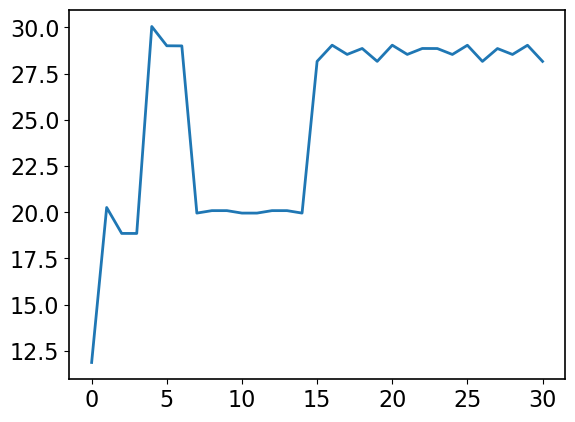

In [6]:
plt.plot(np.sqrt(np.diagonal(a)/np.diagonal(b)))